实验设计如下：  
应用目前比较流行的模型，如VGG,Inception,ResNet,Xception,DenseNet及其演化模型对猪进行识别，由于训练样本数据太少，所以采用迁移学习的方式进行训练，为了公平的检验各算法在猪脸识别上的表现，所以采用只去除全连接层，添加一个新的全连接层的方式进行训练，对网络内部的参数不进行任何调整，各模型的参数均选择在ImageNet上进行预训练过的

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from matplotlib import collections
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.ticker import FuncFormatter, MaxNLocator

%matplotlib inline
plt.rc('font', family='time new roman', size=13)

In [2]:
#Vgg16参数
vgg16epoch1trainacc=0.3635
vgg16epoch1valacc=0.5150
vgg16epoch1trainloss=5.5050
vgg16epoch1valloss=1.6763
vgg16epoch1time=678

vgg16epoch2trainacc=0.5985
vgg16epoch2valacc=0.6336
vgg16epoch2trainloss=1.3721
vgg16epoch2valloss=1.2542
vgg16epoch2time=648

vgg16epoch3trainacc=0.6637
vgg16epoch3valacc=0.6799
vgg16epoch3trainloss=1.1364
vgg16epoch3valloss=1.0801
vgg16epoch3time=635

In [3]:
#Vgg19参数
vgg19epoch1trainacc=0.2857
vgg19epoch1valacc=0.4709
vgg19epoch1trainloss=7.1869
vgg19epoch1valloss=1.8846
vgg19epoch1time=598

vgg19epoch2trainacc=0.5526
vgg19epoch2valacc=0.5819
vgg19epoch2trainloss=1.5387
vgg19epoch2valloss=1.4257
vgg19epoch2time=580

vgg19epoch3trainacc=0.6250
vgg19epoch3valacc=0.6326
vgg19epoch3trainloss=1.2742
vgg19epoch3valloss=1.2237
vgg19epoch3time=584

In [4]:
#Xception参数
Xceptionepoch1trainacc=0.6134
Xceptionepoch1valacc=0.7784
Xceptionepoch1trainloss=1.3617
Xceptionepoch1valloss=0.7612
Xceptionepoch1time=3049

Xceptionepoch2trainacc=0.7787
Xceptionepoch2valacc=0.8438
Xceptionepoch2trainloss=0.7317
Xceptionepoch2valloss=0.5218
Xceptionepoch2time=3040

Xceptionepoch3trainacc=0.8272
Xceptionepoch3valacc=0.8536
Xceptionepoch3trainloss=0.5703
Xceptionepoch3valloss=0.4877
Xceptionepoch3time=3040

In [5]:
#iception_v3参数
inceptionepoch1trainacc=0.5392
inceptionepoch1valacc=0.7474
inceptionepoch1trainloss=1.6689
inceptionepoch1valloss=0.8734
inceptionepoch1time=2106

inceptionepoch2trainacc=0.7235
inceptionepoch2valacc=0.7518
inceptionepoch2trainloss=0.9232
inceptionepoch2valloss=0.8210
inceptionepoch2time=2085

inceptionepoch3trainacc=0.7714
inceptionepoch3valacc=0.7937
inceptionepoch3trainloss=0.7538
inceptionepoch3valloss=0.6706
inceptionepoch3time=2085

In [6]:
#iceptionresnet参数
inceptionresnetepoch1trainacc=0.5258
inceptionresnetepoch1valacc=0.6696
inceptionresnetepoch1trainloss=1.7285
inceptionresnetepoch1valloss=1.1528
inceptionresnetepoch1time=3911

inceptionresnetepoch2trainacc=0.7262
inceptionresnetepoch2valacc=0.7676
inceptionresnetepoch2trainloss=0.9288
inceptionresnetepoch2valloss=0.8084
inceptionresnetepoch2time=3882

inceptionresnetepoch3trainacc=0.7690
inceptionresnetepoch3valacc=0.7921
inceptionresnetepoch3trainloss=0.7598
inceptionresnetepoch3valloss=0.7224
inceptionresnetepoch3time=3880

In [7]:
#ResNet50参数
resnetepoch1trainacc=0.7827
resnetepoch1valacc=0.8949
resnetepoch1trainloss=0.7495
resnetepoch1valloss=0.3175
resnetepoch1time=1496

resnetepoch2trainacc=0.9007
resnetepoch2valacc=0.9053
resnetepoch2trainloss=0.3119
resnetepoch2valloss=0.2525
resnetepoch2time=1491

resnetepoch3trainacc=0.9238
resnetepoch3valacc=0.9624
resnetepoch3trainloss=0.2341
resnetepoch3valloss=0.1222
resnetepoch3time=1491

In [8]:
#DenseNet169参数
densenet169epoch1trainacc=0.7158
densenet169epoch1valacc=0.8732
densenet169epoch1trainloss=1.3353
densenet169epoch1valloss=0.7561
densenet169epoch1time=1880

densenet169epoch2trainacc=0.8606
densenet169epoch2valacc=0.9260
densenet169epoch2trainloss=0.7717
densenet169epoch2valloss=0.5796
densenet169epoch2time=1880

densenet169epoch3trainacc=0.8885
densenet169epoch3valacc=0.9211
densenet169epoch3trainloss=0.6826
densenet169epoch3valloss=0.5717
densenet169epoch3time=1881

In [9]:
#DenseNet161参数
densenet161epoch1trainacc=0.7411
densenet161epoch1valacc=0.9183
densenet161epoch1trainloss=1.2861
densenet161epoch1valloss=0.6365
densenet161epoch1time=3352

densenet161epoch2trainacc=0.8790
densenet161epoch2valacc=0.9265
densenet161epoch2trainloss=0.7634
densenet161epoch2valloss=0.6110
densenet161epoch2time=3340

densenet161epoch3trainacc=0.9016
densenet161epoch3valacc=0.9194
densenet161epoch3trainloss=0.6760
densenet161epoch3valloss=0.5943
densenet161epoch3time=3340

In [10]:
#DenseNet121参数
densenet121epoch1trainacc=0.6811
densenet121epoch1valacc=0.8274
densenet121epoch1trainloss=1.4356
densenet121epoch1valloss=0.9118
densenet121epoch1time=1581

densenet121epoch2trainacc=0.8256
densenet121epoch2valacc=0.8873
densenet121epoch2trainloss=0.8806
densenet121epoch2valloss=0.6978
densenet121epoch2time=1574

densenet121epoch3trainacc=0.8573
densenet121epoch3valacc=0.9020
densenet121epoch3trainloss=0.7714
densenet121epoch3valloss=0.6142
densenet121epoch3time=1577

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['time new roman'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


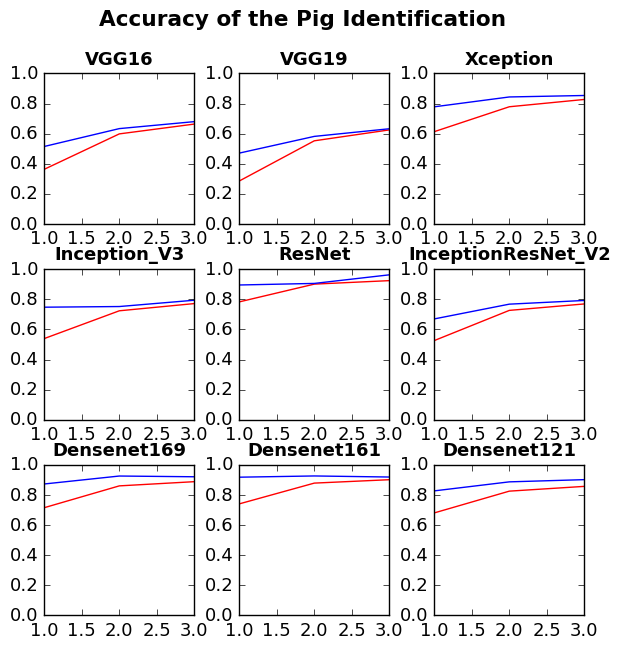

In [11]:
x=[1,2,3]
plt.figure(1)
fig, axes = plt.subplots(3,3)
fig.text(0.5, 1.6, 'Accuracy of the Pig Identification',
             horizontalalignment='center', color='black', weight='bold',
             size='large')
fig.subplots_adjust(top=1.48, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = axes 
ax1.plot(x,[vgg16epoch1trainacc,vgg16epoch2trainacc,vgg16epoch3trainacc],color='red')
ax1.plot(x,[vgg16epoch1valacc,vgg16epoch2valacc,vgg16epoch3valacc],color='blue')
ax1.axis([1,3,0,1])
ax1.set_title('VGG16', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax2.plot(x,[vgg19epoch1trainacc,vgg19epoch2trainacc,vgg19epoch3trainacc],color='red')
ax2.plot(x,[vgg19epoch1valacc,vgg19epoch2valacc,vgg19epoch3valacc],color='blue')
ax2.axis([1,3,0,1])
ax2.set_title('VGG19', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax3.plot(x,[Xceptionepoch1trainacc,Xceptionepoch2trainacc,Xceptionepoch3trainacc],color='red')
ax3.plot(x,[Xceptionepoch1valacc,Xceptionepoch2valacc,Xceptionepoch3valacc],color='blue')
ax3.axis([1,3,0,1])
ax3.set_title('Xception', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax4.plot(x,[inceptionepoch1trainacc,inceptionepoch2trainacc,inceptionepoch3trainacc],color='red')
ax4.plot(x,[inceptionepoch1valacc,inceptionepoch2valacc,inceptionepoch3valacc],color='blue')
ax4.axis([1,3,0,1])
ax4.set_title('Inception_V3', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax5.plot(x,[resnetepoch1trainacc,resnetepoch2trainacc,resnetepoch3trainacc],color='red')
ax5.plot(x,[resnetepoch1valacc,resnetepoch2valacc,resnetepoch3valacc],color='blue')
ax5.axis([1,3,0,1])
ax5.set_title('ResNet', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax6.plot(x,[inceptionresnetepoch1trainacc,inceptionresnetepoch2trainacc,inceptionresnetepoch3trainacc],color='red')
ax6.plot(x,[inceptionresnetepoch1valacc,inceptionresnetepoch2valacc,inceptionresnetepoch3valacc],color='blue')
ax6.axis([1,3,0,1])
ax6.set_title('InceptionResNet_V2', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax7.plot(x,[densenet169epoch1trainacc,densenet169epoch2trainacc,densenet169epoch3trainacc],color='red')
ax7.plot(x,[densenet169epoch1valacc,densenet169epoch2valacc,densenet169epoch3valacc],color='blue')
ax7.axis([1,3,0,1])
ax7.set_title('Densenet169', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax8.plot(x,[densenet161epoch1trainacc,densenet161epoch2trainacc,densenet161epoch3trainacc],color='red')
ax8.plot(x,[densenet161epoch1valacc,densenet161epoch2valacc,densenet161epoch3valacc],color='blue')
ax8.axis([1,3,0,1])
ax8.set_title('Densenet161', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax9.plot(x,[densenet121epoch1trainacc,densenet121epoch2trainacc,densenet121epoch3trainacc],color='red')
ax9.plot(x,[densenet121epoch1valacc,densenet121epoch2valacc,densenet121epoch3valacc],color='blue')
ax9.axis([1,3,0,1])
ax9.set_title('Densenet121', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
plt.show()

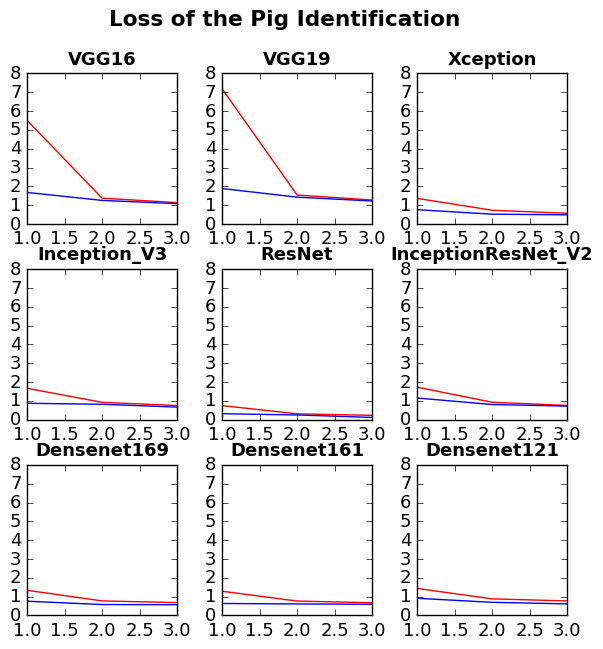

In [12]:
x=[1,2,3]
plt.figure(2)
fig, axes = plt.subplots(3,3)
fig.text(0.5, 1.6, 'Loss of the Pig Identification',
             horizontalalignment='center', color='black', weight='bold',
             size='large')
fig.subplots_adjust(top=1.48, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = axes 
ax1.plot(x,[vgg16epoch1trainloss,vgg16epoch2trainloss,vgg16epoch3trainloss],color='red')
ax1.plot(x,[vgg16epoch1valloss,vgg16epoch2valloss,vgg16epoch3valloss],color='blue')
ax1.axis([1,3,0,8])
ax1.set_title('VGG16', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax2.plot(x,[vgg19epoch1trainloss,vgg19epoch2trainloss,vgg19epoch3trainloss],color='red')
ax2.plot(x,[vgg19epoch1valloss,vgg19epoch2valloss,vgg19epoch3valloss],color='blue')
ax2.axis([1,3,0,8])
ax2.set_title('VGG19', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax3.plot(x,[Xceptionepoch1trainloss,Xceptionepoch2trainloss,Xceptionepoch3trainloss],color='red')
ax3.plot(x,[Xceptionepoch1valloss,Xceptionepoch2valloss,Xceptionepoch3valloss],color='blue')
ax3.axis([1,3,0,8])
ax3.set_title('Xception', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax4.plot(x,[inceptionepoch1trainloss,inceptionepoch2trainloss,inceptionepoch3trainloss],color='red')
ax4.plot(x,[inceptionepoch1valloss,inceptionepoch2valloss,inceptionepoch3valloss],color='blue')
ax4.axis([1,3,0,8])
ax4.set_title('Inception_V3', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax5.plot(x,[resnetepoch1trainloss,resnetepoch2trainloss,resnetepoch3trainloss],color='red')
ax5.plot(x,[resnetepoch1valloss,resnetepoch2valloss,resnetepoch3valloss],color='blue')
ax5.axis([1,3,0,8])
ax5.set_title('ResNet', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax6.plot(x,[inceptionresnetepoch1trainloss,inceptionresnetepoch2trainloss,inceptionresnetepoch3trainloss],color='red')
ax6.plot(x,[inceptionresnetepoch1valloss,inceptionresnetepoch2valloss,inceptionresnetepoch3valloss],color='blue')
ax6.axis([1,3,0,8])
ax6.set_title('InceptionResNet_V2', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax7.plot(x,[densenet169epoch1trainloss,densenet169epoch2trainloss,densenet169epoch3trainloss],color='red')
ax7.plot(x,[densenet169epoch1valloss,densenet169epoch2valloss,densenet169epoch3valloss],color='blue')
ax7.axis([1,3,0,8])
ax7.set_title('Densenet169', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax8.plot(x,[densenet161epoch1trainloss,densenet161epoch2trainloss,densenet161epoch3trainloss],color='red')
ax8.plot(x,[densenet161epoch1valloss,densenet161epoch2valloss,densenet161epoch3valloss],color='blue')
ax8.axis([1,3,0,8])
ax8.set_title('Densenet161', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax9.plot(x,[densenet121epoch1trainloss,densenet121epoch2trainloss,densenet121epoch3trainloss],color='red')
ax9.plot(x,[densenet121epoch1valloss,densenet121epoch2valloss,densenet121epoch3valloss],color='blue')
ax9.axis([1,3,0,8])
ax9.set_title('Densenet121', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
plt.show()

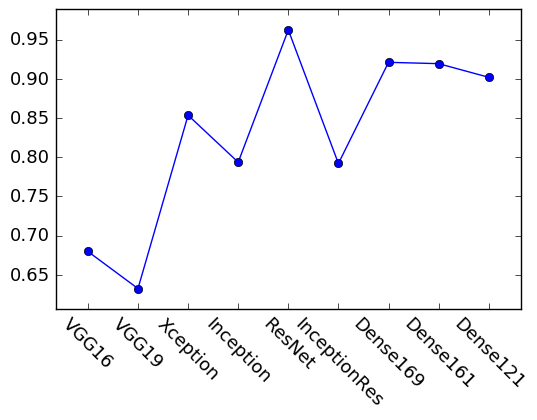

In [13]:
X=['VGG16','VGG19','Xception','Inception','ResNet','InceptionRes','Dense169','Dense161','Dense121']
Y=[vgg16epoch3valacc,vgg19epoch3valacc,Xceptionepoch3valacc,inceptionepoch3valacc,resnetepoch3valacc,inceptionresnetepoch3valacc,densenet169epoch3valacc,densenet161epoch3valacc,densenet121epoch3valacc]
x = range(len(X))

plt.figure(3)
plt.plot(x, Y, 'o-')
plt.xticks( np.arange(18), X,rotation=-45 )
plt.margins(0.08)
plt.subplots_adjust(bottom=0.15)

plt.show()


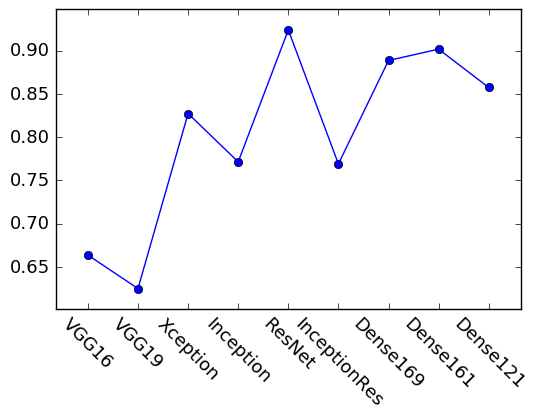

In [14]:
X=['VGG16','VGG19','Xception','Inception','ResNet','InceptionRes','Dense169','Dense161','Dense121']
Y=[vgg16epoch3trainacc,vgg19epoch3trainacc,Xceptionepoch3trainacc,inceptionepoch3trainacc,resnetepoch3trainacc,inceptionresnetepoch3trainacc,densenet169epoch3trainacc,densenet161epoch3trainacc,densenet121epoch3trainacc]
x = range(len(X))

plt.figure(4)
plt.plot(x, Y, 'o-')
plt.xticks( np.arange(18), X,rotation=-45 )
plt.margins(0.08)
plt.subplots_adjust(bottom=0.15)

plt.show()

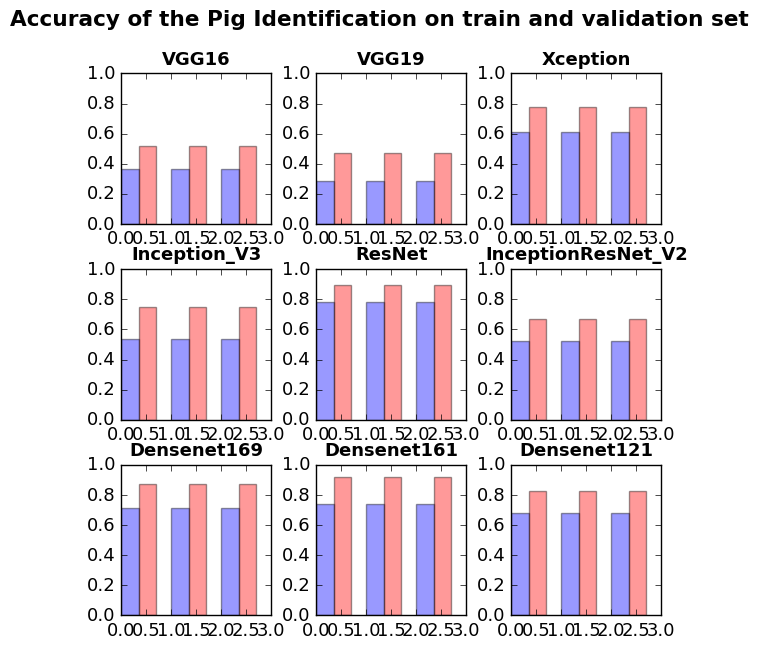

In [15]:
plt.figure(5)
n_groups = 3
fig1, axes = plt.subplots(3,3)
fig1.text(0.5, 1.6, 'Accuracy of the Pig Identification on train and validation set',
             horizontalalignment='center', color='black', weight='bold',
             size='large')
fig1.subplots_adjust(top=1.48, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = axes
vgg16_train = (vgg16epoch1trainacc, vgg16epoch1trainacc, vgg16epoch1trainacc)    
vgg16_val = (vgg16epoch1valacc, vgg16epoch1valacc, vgg16epoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax1.bar(index, vgg16_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax1.bar(index + bar_width, vgg16_val, bar_width,alpha=opacity,color='r',label='val')
ax1.axis([0,3,0,1])
ax1.set_title('VGG16', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
vgg19_train = (vgg19epoch1trainacc, vgg19epoch1trainacc, vgg19epoch1trainacc)    
vgg19_val = (vgg19epoch1valacc, vgg19epoch1valacc, vgg19epoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax2.bar(index, vgg19_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax2.bar(index + bar_width, vgg19_val, bar_width,alpha=opacity,color='r',label='val')
ax2.axis([0,3,0,1])
ax2.set_title('VGG19', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
xception_train = (Xceptionepoch1trainacc, Xceptionepoch1trainacc, Xceptionepoch1trainacc)    
xception_val = (Xceptionepoch1valacc, Xceptionepoch1valacc, Xceptionepoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax3.bar(index, xception_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax3.bar(index + bar_width, xception_val, bar_width,alpha=opacity,color='r',label='val')
ax3.axis([0,3,0,1])
ax3.set_title('Xception', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
inception_train = (inceptionepoch1trainacc, inceptionepoch1trainacc, inceptionepoch1trainacc)    
inception_val = (inceptionepoch1valacc, inceptionepoch1valacc, inceptionepoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax4.bar(index, inception_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax4.bar(index + bar_width, inception_val, bar_width,alpha=opacity,color='r',label='val')
ax4.axis([0,3,0,1])
ax4.set_title('Inception_V3', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
resnet_train = (resnetepoch1trainacc, resnetepoch1trainacc, resnetepoch1trainacc)    
resnet_val = (resnetepoch1valacc, resnetepoch1valacc, resnetepoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax5.bar(index, resnet_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax5.bar(index + bar_width, resnet_val, bar_width,alpha=opacity,color='r',label='val')
ax5.axis([0,3,0,1])
ax5.set_title('ResNet', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
inceptionresnet_train = (inceptionresnetepoch1trainacc, inceptionresnetepoch1trainacc, inceptionresnetepoch1trainacc)    
inceptionresnet_val = (inceptionresnetepoch1valacc, inceptionresnetepoch1valacc, inceptionresnetepoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax6.bar(index, inceptionresnet_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax6.bar(index + bar_width, inceptionresnet_val, bar_width,alpha=opacity,color='r',label='val')
ax6.axis([0,3,0,1])
ax6.set_title('InceptionResNet_V2', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
densenet169_train = (densenet169epoch1trainacc, densenet169epoch1trainacc, densenet169epoch1trainacc)    
densenet169_val = (densenet169epoch1valacc, densenet169epoch1valacc, densenet169epoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax7.bar(index, densenet169_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax7.bar(index + bar_width, densenet169_val, bar_width,alpha=opacity,color='r',label='val')
ax7.axis([0,3,0,1])
ax7.set_title('Densenet169', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
densenet161_train = (densenet161epoch1trainacc, densenet161epoch1trainacc, densenet161epoch1trainacc)    
densenet161_val = (densenet161epoch1valacc, densenet161epoch1valacc, densenet161epoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax8.bar(index, densenet161_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax8.bar(index + bar_width, densenet161_val, bar_width,alpha=opacity,color='r',label='val')
ax8.axis([0,3,0,1])
ax8.set_title('Densenet161', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
densenet121_train = (densenet121epoch1trainacc, densenet121epoch1trainacc, densenet121epoch1trainacc)    
densenet121_val = (densenet121epoch1valacc, densenet121epoch1valacc, densenet121epoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax9.bar(index, densenet121_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax9.bar(index + bar_width, densenet121_val, bar_width,alpha=opacity,color='r',label='val')
ax9.axis([0,3,0,1])
ax9.set_title('Densenet121', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['time new roman'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


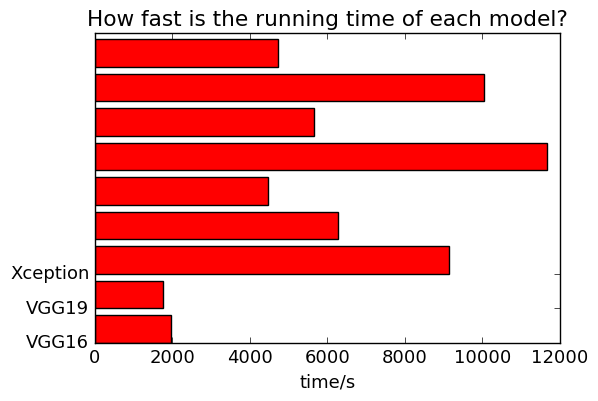

In [16]:
X=('VGG16','VGG19','Xception','Inception','ResNet','InceptionRes','Dense169','Dense161','Dense121')
VGG16_time=vgg16epoch1time+vgg16epoch2time+vgg16epoch3time
VGG19_time=vgg19epoch1time+vgg19epoch2time+vgg19epoch3time
xception_time=Xceptionepoch1time+Xceptionepoch2time+Xceptionepoch3time
inception_time=inceptionepoch1time+inceptionepoch2time+inceptionepoch3time
resnet_time=resnetepoch1time+resnetepoch2time+resnetepoch3time
inceptionresnet_time=inceptionresnetepoch1time+inceptionresnetepoch2time+inceptionresnetepoch3time
densenet169_time=densenet169epoch1time+densenet169epoch2time+densenet169epoch3time
densenet161_time=densenet161epoch1time+densenet161epoch2time+densenet161epoch3time
densenet121_time=densenet121epoch1time+densenet121epoch2time+densenet121epoch3time

Y_time=(VGG16_time,VGG19_time,xception_time,inception_time,resnet_time,inceptionresnet_time,densenet169_time,densenet161_time,densenet121_time)
y_pos = np.arange(len(X))  

plt.barh(y_pos,Y_time,color='r')
plt.yticks(index,X)
plt.xlabel('time/s')
plt.title('How fast is the running time of each model?')

plt.show()

In [17]:
#Xception_120参数
Xception120epoch1trainacc=0.8153
Xception120epoch1valacc=0.8922
Xception120epoch1trainloss=0.6459
Xception120epoch1valloss=0.4775
Xception120epoch1time=3448

Xception120epoch2trainacc=0.9397
Xception120epoch2valacc=0.8122
Xception120epoch2trainloss=0.2254
Xception120epoch2valloss=1.2694
Xception120epoch2time=3441

Xception120epoch3trainacc=0.9545
Xception120epoch3valacc=0.9483
Xception120epoch3trainloss=0.1721
Xception120epoch3valloss=0.2544
Xception120epoch3time=3441

In [21]:
#Xception_100参数
Xception100epoch1trainacc=0.8164
Xception100epoch1valacc=0.9276
Xception100epoch1trainloss=0.6456
Xception100epoch1valloss=0.3813
Xception100epoch1time=4156

Xception100epoch2trainacc=0.9509
Xception100epoch2valacc=0.9597
Xception100epoch2trainloss=0.1975
Xception100epoch2valloss=0.1894
Xception100epoch2time=4148

Xception100epoch3trainacc=0.9648
Xception100epoch3valacc=0.9586
Xception100epoch3trainloss=0.1457
Xception100epoch3valloss=0.2832
Xception100epoch3time=4147

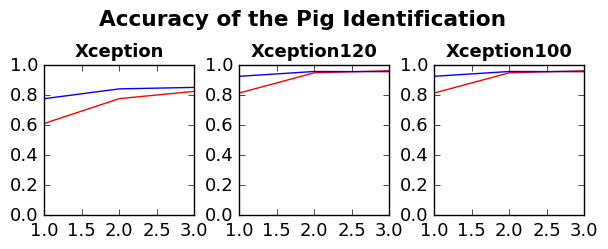

In [31]:
x=[1,2,3]
fig, axes = plt.subplots(1,3)
fig.text(0.5, 0.6, 'Accuracy of the Pig Identification',
             horizontalalignment='center', color='black', weight='bold',
             size='large')
fig.subplots_adjust(top=0.5, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
((ax1, ax2, ax3)) = axes 
ax1.plot(x,[Xceptionepoch1trainacc,Xceptionepoch2trainacc,Xceptionepoch3trainacc],color='red')
ax1.plot(x,[Xceptionepoch1valacc,Xceptionepoch2valacc,Xceptionepoch3valacc],color='blue')
ax1.axis([1,3,0,1])
ax1.set_title('Xception', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax2.plot(x,[Xception120epoch1trainacc,Xception120epoch2trainacc,Xception120epoch3trainacc],color='red')
ax2.plot(x,[Xception120epoch1valacc,Xception120epoch2valacc,Xception120epoch3valacc],color='blue')
ax2.axis([1,3,0,1])
ax2.set_title('Xception120', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax3.plot(x,[Xception100epoch1trainacc,Xception100epoch2trainacc,Xception100epoch3trainacc],color='red')
ax3.plot(x,[Xception100epoch1valacc,Xception100epoch2valacc,Xception100epoch3valacc],color='blue')
ax3.axis([1,3,0,1])
ax3.set_title('Xception100', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
plt.show()

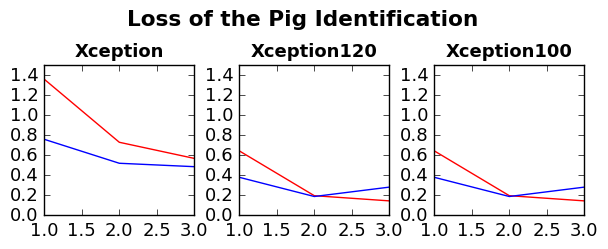

In [35]:
x=[1,2,3]
fig, axes = plt.subplots(1,3)
fig.text(0.5, 0.6, 'Loss of the Pig Identification',
             horizontalalignment='center', color='black', weight='bold',
             size='large')
fig.subplots_adjust(top=0.5, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
((ax1, ax2, ax3)) = axes 
ax1.plot(x,[Xceptionepoch1trainloss,Xceptionepoch2trainloss,Xceptionepoch3trainloss],color='red')
ax1.plot(x,[Xceptionepoch1valloss,Xceptionepoch2valloss,Xceptionepoch3valloss],color='blue')
ax1.axis([1,3,0,1.5])
ax1.set_title('Xception', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax2.plot(x,[Xception120epoch1trainloss,Xception120epoch2trainloss,Xception120epoch3trainloss],color='red')
ax2.plot(x,[Xception120epoch1valloss,Xception120epoch2valloss,Xception120epoch3valloss],color='blue')
ax2.axis([1,3,0,1.5])
ax2.set_title('Xception120', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
ax3.plot(x,[Xception100epoch1trainloss,Xception100epoch2trainloss,Xception100epoch3trainloss],color='red')
ax3.plot(x,[Xception100epoch1valloss,Xception100epoch2valloss,Xception100epoch3valloss],color='blue')
ax3.axis([1,3,0,1.5])
ax3.set_title('Xception100', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
plt.show()

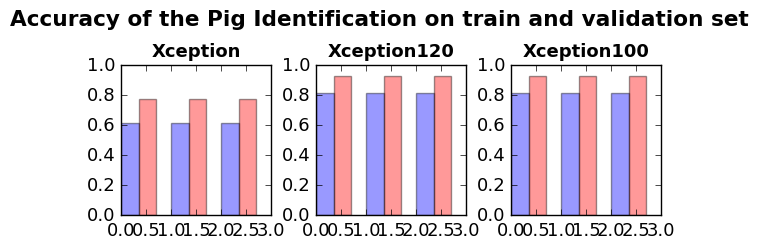

In [36]:
n_groups = 3
fig1, axes = plt.subplots(1,3)
fig1.text(0.5, 0.6, 'Accuracy of the Pig Identification on train and validation set',
             horizontalalignment='center', color='black', weight='bold',
             size='large')
fig1.subplots_adjust(top=0.5, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
((ax1, ax2, ax3)) = axes
xception_train = (Xceptionepoch1trainacc, Xceptionepoch1trainacc, Xceptionepoch1trainacc)    
xception_val = (Xceptionepoch1valacc, Xceptionepoch1valacc, Xceptionepoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax1.bar(index, xception_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax1.bar(index + bar_width, xception_val, bar_width,alpha=opacity,color='r',label='val')
ax1.axis([0,3,0,1])
ax1.set_title('Xception', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
xception120_train = (Xception120epoch1trainacc,Xception120epoch1trainacc, Xception120epoch1trainacc)    
xception120_val = (Xception120epoch1valacc, Xception120epoch1valacc, Xception120epoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax2.bar(index, xception120_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax2.bar(index + bar_width, xception120_val, bar_width,alpha=opacity,color='r',label='val')
ax2.axis([0,3,0,1])
ax2.set_title('Xception120', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
xception100_train = (Xception100epoch1trainacc, Xception100epoch1trainacc,Xception100epoch1trainacc)    
xception100_val = (Xception100epoch1valacc, Xception100epoch1valacc, Xception100epoch1valacc)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = ax3.bar(index, xception100_train, bar_width,alpha=opacity, color='b',label=    'train') 
rects2 = ax3.bar(index + bar_width, xception100_val, bar_width,alpha=opacity,color='r',label='val')
ax3.axis([0,3,0,1])
ax3.set_title('Xception100', weight='bold', size='medium', position=(0.5, 1.05),
                     horizontalalignment='center', verticalalignment='center')
plt.show()

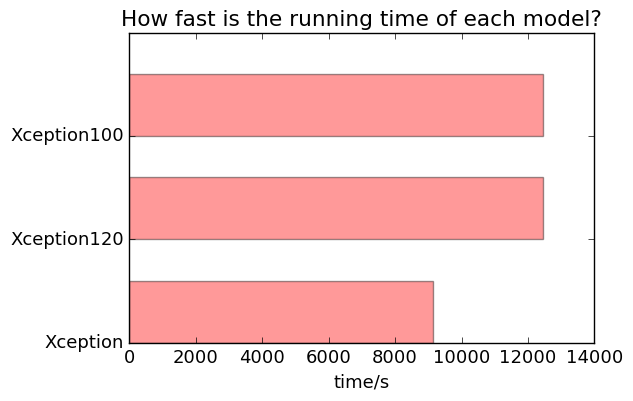

In [46]:
X=('Xception','Xception120','Xception100')
xception_time=Xceptionepoch1time+Xceptionepoch2time+Xceptionepoch3time
xception120_time=Xception120epoch1time+Xception120epoch2time+Xception120epoch3time
xception100_time=Xception100epoch1time+Xception100epoch2time+Xception100epoch3time


Y_time=(xception_time,xception120_time,xception100_time)
y_pos = np.arange(len(X))  

plt.barh(y_pos,Y_time,color='r',alpha=0.4,height=0.6)
plt.yticks(index,X)
plt.xlabel('time/s')
plt.title('How fast is the running time of each model?')

plt.show()

考虑到过拟合的模型没有训练的意义了，所以在准备这个notebook时并没有再跑过拟合的例子，但是在比赛过程中，过拟合的的确确发生了，那个时候我顺手截了两张图片，两张图片代表两种过拟合情况，其中一种情况是将视频逐帧提取，然后训练模型，出现过拟合现象，另外一种情况是在做了图像增强后训练完整模型出现的，因为每类图片有600多张，做完图像增强后，每类图片扩增到2700多张，在InceptionResNet_V2上进行完全训练，出现过拟合现象  
<img src="images/11.png" style="width:891px;height:198px;">
<caption><center> <u> <font color='purple'> **图 1** </u><font color='purple'>  : **逐帧提取过拟合**<br> </center></caption>  
<img src="images/22.png" style="width:814px;height:75px;">
<caption><center> <u> <font color='purple'> **图 2** </u><font color='purple'>  : **完全训练过拟合**<br> </center></caption>  